In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

#Custom function to show open cv image on notebook.
def display_img(cvImg):
    cvImg = cv2.cvtColor(cvImg, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(cvImg)
    plt.axis('off')
    plt.show()

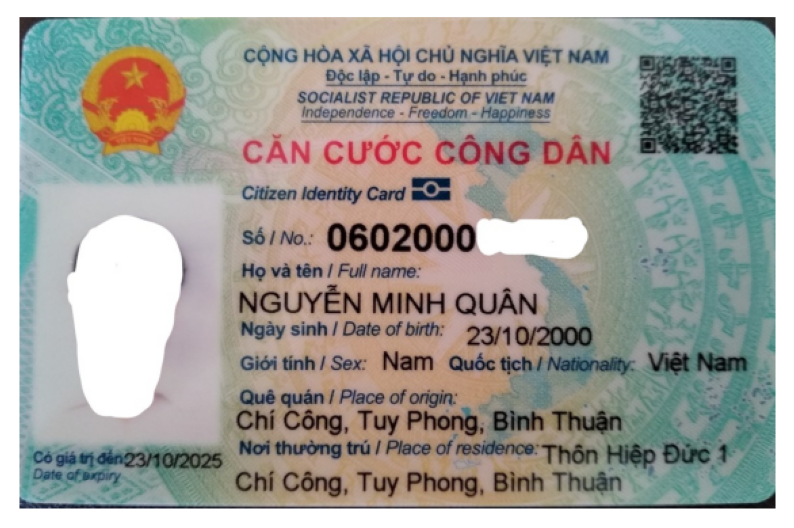

In [5]:
#Loading image using cv2
baseImg = cv2.imread('/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_LuThiSen/resource/data/base_cccd.png')

#Declare image size, width height and chanel
baseH, baseW, baseC = baseImg.shape

display_img(baseImg)

# Detect cccd


0: 640x480 1 cccd, 52.2ms
Speed: 2.4ms preprocess, 52.2ms inference, 98.0ms postprocess per image at shape (1, 3, 640, 480)
<class 'numpy.ndarray'>
(452, 687, 3)
[     131.91      611.64      818.41      1063.5]


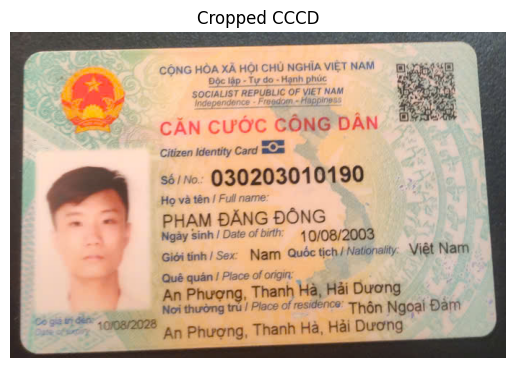

True

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load m√¥ h√¨nh YOLOv8 ƒë√£ hu·∫•n luy·ªán
model = YOLO('/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_LuThiSen/resource/weights/detect_cccd_best.pt')

# ƒê·ªçc ·∫£nh
image_path = '/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_LuThiSen/resource/data/demo_data/2d96c25a99382966702915.jpg'
image = cv2.imread(image_path)
img2 = None

# Detect object
results = model(image)

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # L·∫•y t·ªça ƒë·ªô bounding box

        # Crop ·∫£nh CCCD
        img2 = image[y1:y2, x1:x2]
        bbox = box.xyxy[0].cpu().numpy()
        print(type(img2))
        print(img2.shape)
        print(bbox)
        # L∆∞u ·∫£nh ƒë√£ crop
        cv2.imwrite("cccd_crop.jpg", image)

        # Hi·ªÉn th·ªã ·∫£nh crop b·∫±ng Matplotlib
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.title("Cropped CCCD")
        plt.axis("off")
        plt.show()

# L∆∞u ·∫£nh c√≥ bounding box
cv2.imwrite("output_detect.jpg", img2)


# Preprocess image

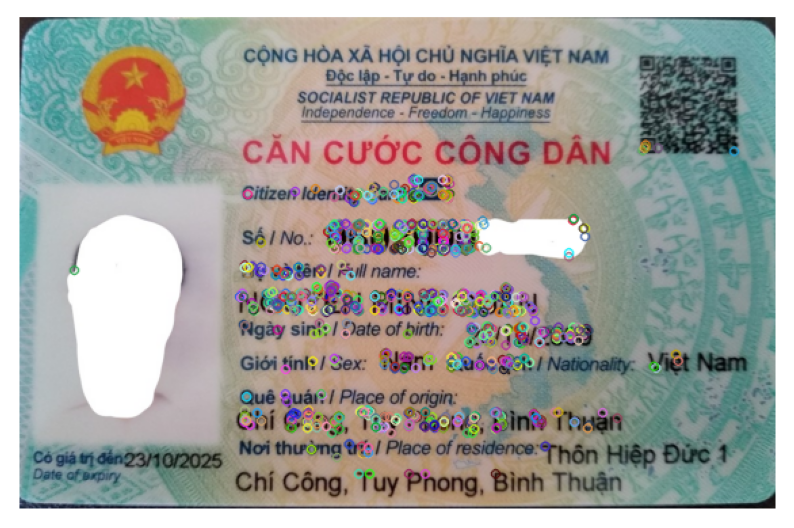

In [5]:
#Init orb, keypoints detection on base Image
orb = cv2.ORB_create(1000)

kp, des = orb.detectAndCompute(baseImg, None)
imgKp = cv2.drawKeypoints(baseImg,kp, None)

display_img(imgKp)

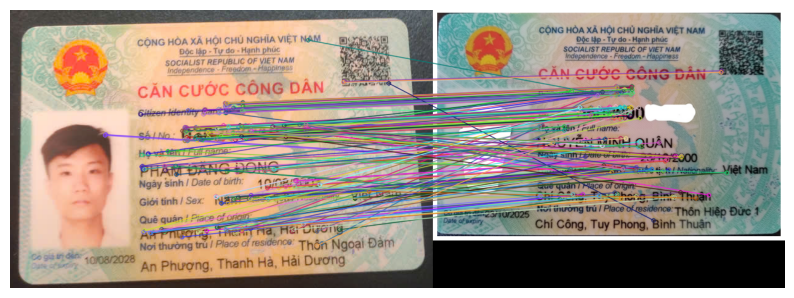

In [6]:
PER_MATCH = 0.25

#Detect keypoint on img2
kp1, des1 = orb.detectAndCompute(img2, None)

#Init BF Matcher, find the matches points of two images
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = list(bf.match(des1, des))

#Select top 30% best matcher 
matches.sort(key=lambda x: x.distance)
best_matches = matches[:int(len(matches)*PER_MATCH)]

#Show match img  
imgMatch = cv2.drawMatches(img2, kp1, baseImg, kp, best_matches,None, flags=2)
display_img(imgMatch)

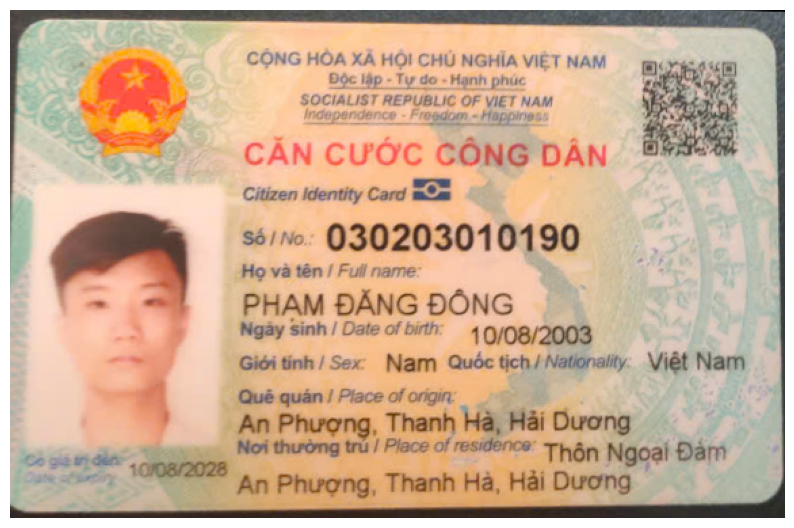

In [7]:
#Init source points and destination points for findHomography function.
srcPoints = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1,1,2)
dstPoints = np.float32([kp[m.trainIdx].pt for m in best_matches]).reshape(-1,1,2)


#Find Homography of two images
matrix_relationship, _ = cv2.findHomography(srcPoints, dstPoints,cv2.RANSAC, 5.0)

#Transform the image to have the same structure as the base image
img_final = cv2.warpPerspective(img2, matrix_relationship, (baseW, baseH))

display_img(img_final)

# Text detect

In [ ]:
# prepare data

# Th∆∞ m·ª•c ch·ª©a ·∫£nh ƒë·∫ßu v√†o
input_folder = "data/Cloud c·ªßa t√¥i [21-03-2025 21_17]"

# Th∆∞ m·ª•c ch·ª©a ·∫£nh ƒë·∫ßu ra (t·∫°o n·∫øu ch∆∞a c√≥)
output_folder = "output_cccd"
os.makedirs(output_folder, exist_ok=True)

# Load m√¥ h√¨nh YOLO ƒë√£ hu·∫•n luy·ªán
model = YOLO("weights/detect_cccd_best.pt")

# L·∫•y danh s√°ch file ·∫£nh trong th∆∞ m·ª•c input
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".png", ".jpeg"))]
print(image_files)
# ƒê·∫øm s·ªë l∆∞·ª£ng ·∫£nh ƒë√£ l∆∞u
count = 1

for image_name in image_files:
    image_path = os.path.join(input_folder, image_name)
    image = cv2.imread(image_path)
    if image is None:
        print(f"L·ªói khi ƒë·ªçc ·∫£nh: {image_name}")
        continue

    # Detect CCCD
    results = model(image)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # L·∫•y t·ªça ƒë·ªô bounding box
            bbox = box.xyxy[0].cpu().numpy()
            print(bbox)
            # C·∫Øt ·∫£nh CCCD t·ª´ ·∫£nh g·ªëc
            cropped_img = image[y1:y2, x1:x2]

            # L∆∞u ·∫£nh ƒë√£ c·∫Øt v√†o th∆∞ m·ª•c output
            output_path = os.path.join(output_folder, f"cccd_{count}.jpg")
            cv2.imwrite(output_path, cropped_img)
            print(f"L∆∞u ·∫£nh: {output_path}")
            count += 1  # TƒÉng s·ªë th·ª© t·ª± ·∫£nh



FileNotFoundError: [Errno 2] No such file or directory: 'data/Cloud c·ªßa t√¥i [21-03-2025 21_17]'

In [ ]:
import cv2
import os
import glob
def transform(img):
    #Init orb, keypoints detection on base Image
    orb = cv2.ORB_create(1000)
    kp, des = orb.detectAndCompute(baseImg, None)
    PER_MATCH = 0.25

    #Detect keypoint on img
    kp1, des1 = orb.detectAndCompute(img, None)

    #Init BF Matcher, find the matches points of two images
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = list(bf.match(des1, des))

    #Select top 30% best matcher 
    matches.sort(key=lambda x: x.distance)
    best_matches = matches[:int(len(matches)*PER_MATCH)]
    
    #Init source points and destination points for findHomography function.
    srcPoints = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1,1,2)
    dstPoints = np.float32([kp[m.trainIdx].pt for m in best_matches]).reshape(-1,1,2)


    #Find Homography of two images
    matrix_relationship, _ = cv2.findHomography(srcPoints, dstPoints,cv2.RANSAC, 5.0)

    #Transform the image to have the same structure as the base image
    img_final = cv2.warpPerspective(img, matrix_relationship, (baseW, baseH))

    return img_final

    
# Th∆∞ m·ª•c ngu·ªìn v√† ƒë√≠ch
source_folder = "output_cccd1/"  # Thay b·∫±ng ƒë∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a ·∫£nh g·ªëc
destination_folder = "output_cccd_rotated/"  # Thay b·∫±ng ƒë∆∞·ªùng d·∫´n th∆∞ m·ª•c ƒë√≠ch

# T·∫°o th∆∞ m·ª•c ƒë√≠ch n·∫øu ch∆∞a c√≥
os.makedirs(destination_folder, exist_ok=True)

image_paths = sorted(glob.glob(os.path.join(source_folder, "*.*")), key=os.path.basename)

# Duy·ªát qua t·ª´ng ·∫£nh
for idx, image_path in enumerate(image_paths, start=1):
    # ƒê·ªçc ·∫£nh
    img = cv2.imread(image_path)
    
    # T·∫°o t√™n file m·ªõi theo th·ª© t·ª±
    new_filename = os.path.join(destination_folder, f"{idx:04d}.png")  # 0001.png, 0002.png,...
    
    # Ghi ·∫£nh v√†o th∆∞ m·ª•c ƒë√≠ch
    cv2.imwrite(new_filename, transform(img))
    print(f"ƒê√£ l∆∞u: {new_filename}")

print("Ho√†n th√†nh x·ª≠ l√Ω ·∫£nh!")


ƒê√£ l∆∞u: output_cccd_rotated/0001.png
ƒê√£ l∆∞u: output_cccd_rotated/0002.png
ƒê√£ l∆∞u: output_cccd_rotated/0003.png
ƒê√£ l∆∞u: output_cccd_rotated/0004.png
ƒê√£ l∆∞u: output_cccd_rotated/0005.png
ƒê√£ l∆∞u: output_cccd_rotated/0006.png
ƒê√£ l∆∞u: output_cccd_rotated/0007.png
ƒê√£ l∆∞u: output_cccd_rotated/0008.png
ƒê√£ l∆∞u: output_cccd_rotated/0009.png
ƒê√£ l∆∞u: output_cccd_rotated/0010.png
ƒê√£ l∆∞u: output_cccd_rotated/0011.png
ƒê√£ l∆∞u: output_cccd_rotated/0012.png
ƒê√£ l∆∞u: output_cccd_rotated/0013.png
ƒê√£ l∆∞u: output_cccd_rotated/0014.png
ƒê√£ l∆∞u: output_cccd_rotated/0015.png
ƒê√£ l∆∞u: output_cccd_rotated/0016.png
ƒê√£ l∆∞u: output_cccd_rotated/0017.png
ƒê√£ l∆∞u: output_cccd_rotated/0018.png
ƒê√£ l∆∞u: output_cccd_rotated/0019.png
ƒê√£ l∆∞u: output_cccd_rotated/0020.png
ƒê√£ l∆∞u: output_cccd_rotated/0021.png
Ho√†n th√†nh x·ª≠ l√Ω ·∫£nh!


In [8]:
import cv2
import torch
from ultralytics import YOLO
model = YOLO("/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_LuThiSen/resource/weights/detect_text_best.pt")  # C√≥ th·ªÉ thay b·∫±ng yolov8n.pt, yolov8m.pt, ...

# ƒê·ªçc ·∫£nh
image_path = "/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_LuThiSen/resource/data/output_cccd_rotated/0003.png"
image = cv2.imread(image_path)

# Ch·∫°y model YOLO detect v·∫≠t th·ªÉ
results = model(image)

# Danh s√°ch l∆∞u th√¥ng tin v·∫≠t th·ªÉ
image_text_list = []

# Duy·ªát qua t·ª´ng v·∫≠t th·ªÉ ƒë∆∞·ª£c ph√°t hi·ªán
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # L·∫•y t·ªça ƒë·ªô (xmin, ymin, xmax, ymax)
        bbox = box.xyxy[0].cpu().numpy()
        
        cropped_img_image = image[y1:y2, x1:x2]
        conf = float(box.conf[0])  # ƒê·ªô tin c·∫≠y (confidence)
        cls = int(box.cls[0])  # Nh√£n l·ªõp (class ID)
        class_name = model.names[cls]  # L·∫•y t√™n l·ªõp (vd: 'person', 'car',...)

        # Th√™m v√†o danh s√°ch
        image_text_list.append({
            "class": class_name,
            "bbox": cropped_img_image,
            "bboxs": bbox,
            "confidence": conf
        })

# In k·∫øt qu·∫£
for obj in image_text_list:
    print(obj)

print(f"ƒê√£ ph√°t hi·ªán {len(image_text_list)} v·∫≠t th·ªÉ!")



0: 448x640 3 births, 10 names, 1 no, 213.2ms
Speed: 4.7ms preprocess, 213.2ms inference, 3.9ms postprocess per image at shape (1, 3, 448, 640)
{'class': 'name', 'bbox': array([[[157, 197, 229],
        [156, 198, 227],
        [154, 197, 227],
        ...,
        [174, 202, 249],
        [173, 202, 247],
        [173, 202, 247]],

       [[156, 198, 228],
        [155, 199, 228],
        [152, 199, 228],
        ...,
        [173, 201, 248],
        [172, 200, 247],
        [173, 202, 249]],

       [[158, 200, 229],
        [157, 201, 228],
        [151, 198, 227],
        ...,
        [172, 201, 248],
        [173, 201, 248],
        [172, 201, 248]],

       ...,

       [[130, 168, 195],
        [104, 141, 164],
        [ 79, 112, 129],
        ...,
        [159, 193, 241],
        [157, 193, 242],
        [151, 191, 240]],

       [[128, 162, 189],
        [ 97, 130, 152],
        [ 89, 119, 134],
        ...,
        [159, 195, 241],
        [161, 198, 246],
        [147, 186, 

# OCR texts

In [2]:

preprocesing_image_text_list = []
def preprocessing_image(img):
    #Resize image 
    #img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

    #convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.multiply(gray, 1.5)
    
    #blur remove noise
    blured1 = cv2.medianBlur(gray,3)
    blured2 = cv2.medianBlur(gray,51)
    divided = np.ma.divide(blured1, blured2).data
    normed = np.uint8(255*divided/divided.max())
    
    
    #Threshold image
    th, threshed = cv2.threshold(normed, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    
    
    return threshed
for img in image_text_list:
    pre_img = preprocessing_image(img["bbox"])
    preprocesing_image_text_list.append(pre_img)
    display_img(pre_img)

NameError: name 'image_text_list' is not defined

In [10]:


from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import os
from PIL import Image
import numpy as np

YOLO_MODEL_PATH = os.getenv("YOLO_MODEL_PATH", "ocr/best.pt")
CONFIDENCE_THRESHOLD =  0.25
OCR_CONFIG_NAME = "vgg_transformer"
OCR_DEVICE = "cpu"

def load_ocr_model() -> Predictor:
    """Load VietOCR model."""
    config = Cfg.load_config_from_name(OCR_CONFIG_NAME)
    config['device'] = OCR_DEVICE  # Use GPU if available
    return Predictor(config)

ocr_model = load_ocr_model()

# Th·ª±c hi·ªán OCR
for text_img in preprocesing_image_text_list:
    if isinstance(text_img, np.ndarray):
        text_img = Image.fromarray(text_img)  # Chuy·ªÉn numpy -> PIL
    text = ocr_model.predict(text_img)
    print("K·∫øt qu·∫£ OCR:", text, type(text))


/home/anodi108/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anodi108/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/anodi108/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Cached Downloading: /home/anodi108/.cache/gdown/https-COLON--SLA

FileNotFoundError: [Errno 2] No such file or directory: '/home/anodi108/.cache/gdown/tmpbi60496_/dl'

In [1]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from PIL import Image

# C·∫•u h√¨nh model
OCR_CONFIG_NAME = "vgg_transformer"  # Ho·∫∑c 'resnet_transformer', 'vgg_seq2seq'
OCR_DEVICE = "cpu"  # Ho·∫∑c "cuda" n·∫øu d√πng GPU
OCR_MODELPATH = '/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_LuThiSen/resource/weights/transformerocr-1.pth'
# H√†m t·∫£i model VietOCR
def load_ocr_model():
    config = Cfg.load_config_from_name(OCR_CONFIG_NAME)
    config['device'] = OCR_DEVICE
    config['weights'] = OCR_MODELPATH
    config['cnn']['pretrained']=False
    model = Predictor(config)
    return model

# H√†m nh·∫≠n di·ªán ch·ªØ t·ª´ ·∫£nh
def recognize_text(image_path):
    ocr_model = load_ocr_model()
    img = Image.open(image_path).convert('RGB')  # M·ªü ·∫£nh, ƒë·∫£m b·∫£o ƒë√∫ng ƒë·ªãnh d·∫°ng
    text = ocr_model.predict(img)  # Th·ª±c hi·ªán OCR
    return text

# üñº Test v·ªõi m·ªôt ·∫£nh
image_path = "/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_LuThiSen/resource/data/output_cccd1/cccd_2.jpg"  # ƒê·ªïi th√†nh ƒë∆∞·ªùng d·∫´n ·∫£nh c·ªßa b·∫°n
result = recognize_text(image_path)
print("K·∫øt qu·∫£ OCR:", result)


/home/anodi108/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anodi108/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/anodi108/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


K·∫øt qu·∫£ OCR: 12


In [15]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2025-03-30 08:02:49--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‚Äòdata_line.zip‚Äô

data_line.zip       100%[===================>]  58.38M  1.48MB/s    in 41s     

2025-03-30 08:03:31 (1.41 MB/s) - ‚Äòdata_line.zip‚Äô saved [61212284/61212284]

